<a href="https://colab.research.google.com/github/ofcoursenotcoding1/Text-Classification-Model/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dataframe = pd.read_csv("spam_classification.csv")

In [ ]:
import tensorflow as tf

In [ ]:
dataframe.head(20)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
dataframe.nunique()

,0
Category,2
Message,5157


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
dataframe.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
dataframe['Category']

,Category
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
5567,spam
5568,ham
5569,ham
5570,ham


<Axes: >

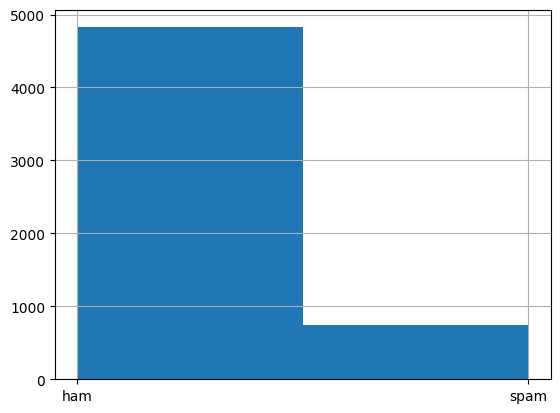

In [ ]:
dataframe['Category'].hist(bins=2)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
dataframe['new_category'] = dataframe['Category'].apply(lambda x: 0 if x == 'ham' else 1)

In [ ]:
X = dataframe['Message']
y = dataframe['new_category']

In [ ]:
dataframe

,Category,Message,new_category
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [ ]:
vectorizer = CountVectorizer()

In [ ]:
vectorizer.fit(X)

CountVectorizer()

In [ ]:
X_matrix = vectorizer.transform(X)

In [ ]:
X_matrix

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 74098 stored elements and shape (5572, 8709)>

In [ ]:
X_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_matrix.toarray(), y, test_size=0.2, random_state = 31, stratify=y)

In [ ]:
y

,new_category
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(tf.keras.optimizers.Adam(learning_rate= 0.001), loss = tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train, batch_size = 64, epochs = 32, validation_data = (X_test, y_test))

Epoch 1/32
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.8694 - loss: 0.5841 - val_accuracy: 0.9507 - val_loss: 0.2805
Epoch 2/32
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9678 - loss: 0.2113 - val_accuracy: 0.9803 - val_loss: 0.1244
Epoch 3/32
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9928 - loss: 0.0822 - val_accuracy: 0.9857 - val_loss: 0.0779
Epoch 4/32
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9950 - loss: 0.0394 - val_accuracy: 0.9883 - val_loss: 0.0628
Epoch 5/32
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9967 - loss: 0.0222 - val_accuracy: 0.9892 - val_loss: 0.0569
Epoch 6/32
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9987 - loss: 0.0125 - val_accuracy: 0.9892 - val_loss: 0.0561
Epoch 7/32
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9997 - loss: 0.0078 - val_accuracy: 0.9883 - val_loss: 0.0593
Epoch 8/32
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9982 - loss: 0.0080 - val_accuracy: 0.9892 - v

In [ ]:
model.evaluate(X_test, y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9902 - loss: 0.0643


[0.09292972087860107, 0.9874439239501953]

In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])